<a href="https://colab.research.google.com/github/chiragits/logstress/blob/main/Logstress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1 Load dataset
df = pd.read_csv("merged_file(1).csv")
print("CSV file loaded successfully ")
print("Columns:", df.columns.tolist())
print(df.head())

# Step 2 Features and Labels
X = df.drop("Label", axis=1)
y = df["Label"]

# Convert to binary:
# Label = 2 → Stress (1), All other labels → No Stress (0)
y_binary = (y == 2).astype(int)

# Step 3 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Step 4 Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("\n===== Logistic Regression (Binary: Stress vs No Stress) =====")
print(classification_report(y_test, y_pred_log))

# Step 5 Save the trained model
with open("logreg.pkl", "wb") as f:
    pickle.dump(log_reg, f)

print("Model saved successfully as logreg.pkl")



CSV file loaded successfully 
Columns: ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_SDRMSSD', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'Label']
   HRV_MeanNN    HRV_SDNN  HRV_RMSSD   HRV_SDSD  HRV_CVNN  HRV_CVSD  \
0  704.390244   72.383185  51.700669  52.356854  0.102760  0.073398   
1  781.351351  105.003480  78.436031  79.316188  0.134387  0.100385   
2  814.285714   77.934777  57.321674  58.181061  0.095709  0.070395   
3  875.367965   55.925687  48.130218  48.822015  0.063888  0.054983   
4  841.554622   55.473860  54.611689  55.387019  0.065918  0.064894   

   HRV_MedianNN  HRV_MadNN  HRV_MCVNN   HRV_IQRNN  HRV_SDRMSSD  HRV_Prc20NN  \
0    684.285714     52.950   0.077380   82.857143     1.400043   651.428571   
1    782.857143    137.670   0.175856  184.285714     1.338715   688.857143   
2    814.285714     95.310   0.117047

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Class distribution in full dataset:")
print(y_binary.value_counts())



Class distribution in full dataset:
Label
0    1118
1     318
Name: count, dtype: int64


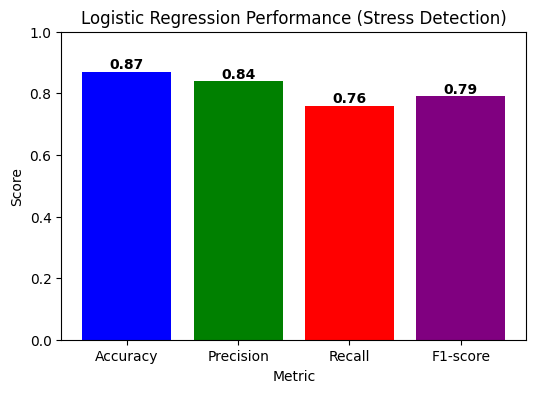

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics from classification report
accuracy = 0.87
precision = 0.84
recall = 0.76
f1 = 0.79

# Data
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
scores = [accuracy, precision, recall, f1]

# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(metrics, scores, color=["blue","green","red","purple"])

# Add value labels on bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', fontsize=10, fontweight='bold')

# Labels and title
plt.ylim(0,1.0)
plt.ylabel("Score")
plt.xlabel("Metric")
plt.title("Logistic Regression Performance (Stress Detection)")
plt.show()
